## **Business Understanding** ##

<span style="color:yellow">Context:</span>
As a significant player in the digital hospitality industry, Airbnb faces unique challenges in managing and optimizing its listings. With a business model focused on accommodations provided by individuals and companies, Airbnb relies on data from listings to determine its business strategies and policies. This dataset, encompassing various aspects of listings in Bangkok, allows us to delve deeper into the market dynamics, consumer preferences, and factors influencing the success of a listing.

<span style="color:yellow">Problem Statement:</span>
Amid intense market competition and the need to maintain service quality, Airbnb confronts challenges in maximizing revenue and ensuring customer satisfaction. A primary issue is how to set optimal pricing, enhance the popularity of listings, and understand the impact of location and other factors on listing performance. With this dataset, we can analyze the factors affecting listing performance and identify ways to improve hosts' success on the Airbnb platform.

<span style="color:yellow">Goals:</span>
The main goal of this analysis is to provide insights that can help Airbnb and its hosts make more informed decisions regarding pricing, promotion, and listing management. Specifically, we aim to:
1. Identify the factors influencing the price and popularity of listings.
2. Determine the impact of location and other characteristics on listing performance.
3. Develop recommendations based on the analysis to improve revenue and customer satisfaction.

Stakeholders: The primary stakeholders of this analysis are the managers and executives at Airbnb responsible for operational strategy and the hosts who use the Airbnb platform to rent out their properties.

<span style="color:yellow">Analytic Approach:</span>
The first step in this analysis is to examine the dataset to identify the critical characteristics of listings that play a significant role in determining price, popularity, and overall success on Airbnb. We will analyze the data descriptively to gain a basic understanding, followed by inferential statistical analysis to identify patterns and relationships. Based on this analysis, we will develop recommendations to help Airbnb and its hosts make more informed decisions regarding managing and promoting their listings.

<span style="color:yellow">Metric Evaluation</span>

To evaluate the success of this analysis, we will use metrics such as:

1. Accuracy in identifying the factors that influence price and popularity.
2. Relevance and applicability of recommendations in the Airbnb business context.
3. The potential impact of the recommendations on increasing revenue and customer satisfaction.

### Library ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.impute import KNNImputer
from scipy.stats import anderson

### Load Initial Dataset ###

In [2]:
# Read the CSV file
with open('Airbnb Listings Bangkok.csv', 'r') as file:
    airbnb = pd.read_csv(file)

# Make a copy of the DataFrame
df = airbnb.copy(deep=True)

df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## **Data Understanding** ##

### Skimming data ###

In [3]:
df.shape

(15854, 17)

In [4]:
pd.DataFrame({
        'feature'           : df.columns.values,
        'data_type'         : df.dtypes.values,
        'null_value(%)'     : df.isna().mean().values * 100,
        'n_unique'          : df.nunique().values,
        'duplicate'         : df.duplicated().sum(),
        'Negative_value_num': [len(df[col][df[col] < 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
        'Zero_value_num'    : [len(df[col][df[col] == 0])/ len(df) * 100 if col in df.select_dtypes(include=np.number).columns else 0 for col in df.columns],
        'Zero_value_obj'    : [len(df[col][df[col] == ''])/ len(df) * 100 if col in df.select_dtypes(include=np.object_).columns else 0 for col in df.columns],
        'sample_unique'     : [df[col].unique() for col in df.columns]}
    ).round(3)

,feature,data_type,null_value(%),n_unique,duplicate,Negative_value_num,Zero_value_num,Zero_value_obj,sample_unique
0,Unnamed: 0,int64,0.000,15854,0,0.0,0.006,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,0.000,15854,0,0.0,0.000,0.0,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
2,name,object,0.050,14794,0,0.0,0.000,0.0,"[Nice room with superb city view, Easy going l..."
3,host_id,int64,0.000,6659,0,0.0,0.000,0.0,"[120437, 120541, 123784, 153730, 610315, 21296..."
4,host_name,object,0.000,5313,0,0.0,0.000,0.0,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
5,neighbourhood,object,0.000,50,0,0.0,0.000,0.0,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,float64,0.000,9606,0,0.0,0.000,0.0,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,float64,0.000,10224,0,0.0,0.000,0.0,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,object,0.000,4,0,0.0,0.000,0.0,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,int64,0.000,3040,0,0.0,0.006,0.0,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."


In [5]:
Statdescribe = df.describe()
Statdescribe

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


### Data Distribution ###

Check the normal distribution using the Anderson test because it is suitable for the size of the existing dataset.If the statistic is greater than the critical value, then the data is not normally distributed and vice versa."

In [6]:
def anderson_test_and_results(df):
    columns_to_test = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
    results = {}

    for col in columns_to_test:
        # Apply Anderson-Darling test
        ad_statistic, ad_critical_values, ad_significance_levels = anderson(df[col].dropna())
        
        # Determine if data is normal based on 5% significance level
        if ad_statistic > ad_critical_values[2]:
            conclusion = "Not normally distributed"
        else:
            conclusion = "Normally distributed."
        
        results[col] = {
            'Statistic': ad_statistic,
            'Critical Value (5%)': ad_critical_values[2],
            'Conclusion': conclusion
        }
    
    return results

anderson_test_results = anderson_test_and_results(df)

# Convert results to a table format
table_data = [(key,) + tuple(value.values()) for key, value in anderson_test_results.items()]
headers = ['Column', 'Statistic', 'Critical Value (5%)', 'Conclusion']

# Display the table using tabulate
table = tabulate(table_data, headers=headers, tablefmt="grid")
print(table)

+--------------------------------+-------------+-----------------------+--------------------------+
| Column                         |   Statistic |   Critical Value (5%) | Conclusion               |
+================================+=============+=======================+==========================+
| price                          |    5143.87  |                 0.787 | Not normally distributed |
+--------------------------------+-------------+-----------------------+--------------------------+
| minimum_nights                 |    3821.8   |                 0.787 | Not normally distributed |
+--------------------------------+-------------+-----------------------+--------------------------+
| number_of_reviews              |    2852.22  |                 0.787 | Not normally distributed |
+--------------------------------+-------------+-----------------------+--------------------------+
| reviews_per_month              |     756.063 |                 0.787 | Not normally distributed |


From skimming the data above, I have identified several findings that need to be addressed to make it more user-friendly before proceeding with further data cleaning:

1. I would like to rename the 'id' and 'name' columns to 'listing_id' and 'listing_name' for user convenience and to avoid any misinterpretation.
2. I found that there are values of 0 in the 'price' column, accounting for 0.006% of the data. There shouldn't be any property listings with a value of 0. Even though this percentage is small, I need to adjust these values according to domain knowledge if available. If domain knowledge is'nt available, I will replace these values with the media since the data is not normally distributed.
3. I found that the 'Availability_365' column has a value of 0 for 5.4% of the listings. This percentage is significant, and I have decided to retain these values, assuming that the zero value occurred because the property owner no longer lists their property on Airbnb.

In addition to the above, further steps will be taken in the data cleaning process.

In [7]:
# Rename the columns
df.rename(columns={'id': 'listing_id', 'name': 'listing_name'}, inplace=True)

df

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [8]:
# Showing price that have 0 value
df[df['price'] == 0]

,Unnamed: 0,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,NaN,NaN,1,0,0


Even though there's only one value of 0 and it has never been reviewed, I don't want to drop that data. After checking, there is no available domain knowledge, so I decided to use the median to handle that 0 value.

In [9]:
# Calculate the median of the 'price' column
median_price = df['price'].median()

# Replace all 0 values in the 'price' column with the median value
df['price'] = df['price'].replace(0, median_price)

# Check if there are any values equal to 0 in the "price" column
has_zero_price = (df['price'] == 0).any()

# Print the result
if has_zero_price:
    print("There are values equal to 0 in the 'price' column.")
else:
    print("There are no values equal to 0 in the 'price' column.")

There are no values equal to 0 in the 'price' column.


## **Data Cleaning** ##



### ***1. Handling Data Format*** ###

The data format based on its data type is already good, except for the data type in the 'last_review' column which is an object. The 'last_review' column contains the date of the last review on a property listing. Ideally, its data type should be datetime.

In [10]:
# Convert the "last_review" column to datetime
df['last_review'] = pd.to_datetime(df['last_review'])
df.dtypes

Unnamed: 0                                 int64
listing_id                                 int64
listing_name                              object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object

### ***2. Handling Unnecessary Columns*** ###

The "Unnamed: 0" column is redundant since we already have the "id" column, which serves as a unique identifier for each listing. We should remove this entire column.

In [11]:
# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,NaN,3,365,0


### ***3. Handling Null Value*** ###

In [12]:
# Display the count of null values per column
null_counts = df.isna().sum()

# Calculate the percentage of null values for each column
null_percentage = (df.isna().sum() / len(df)) * 100

# Combine the count and percentage into a DataFrame for easy viewing
null_summary = pd.DataFrame({
    'Feature': null_counts.index,
    'Null Counts': null_counts.values,
    'Percentage (%)': null_percentage.values
})

# Display the count of null values per column
null_summary

,Feature,Null Counts,Percentage (%)
0,listing_id,0,0.000000
1,listing_name,8,0.050460
2,host_id,0,0.000000
3,host_name,0,0.000000
4,neighbourhood,0,0.000000
5,latitude,0,0.000000
6,longitude,0,0.000000
7,room_type,0,0.000000
8,price,0,0.000000
9,minimum_nights,0,0.000000


From the data above, there are:

1. 8 missing data in the 'name' column or 0.0505%.
2. 5790 missing data in the 'last_review' column or 36.5208%.
3. 5790 missing data in the 'review_per_month' column or 36.5208%.

Overall, there's a need to handle these null values.

#### **3a. Handling Null Value on Name Column** ####

***Check Null value on Name Column***

In [13]:
# Filter the DataFrame to show rows with missing values in the "listing_name" column
missing_listing_name_rows = df[df['listing_name'].isnull()]

# Display the rows with missing values in the "listing_name" column
missing_listing_name_rows

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


There are 8 missing values in the "name" column. This should not have happened because "name" is mandatory data when a host registers their property on the Airbnb platform. However, there's 1 host name with id = 13142743 which has a calculated_host_listings_count of 3, so further checks are needed. As for the rest of the missing data in the "name" column, there is no commonality that can be used to fill in the missing data, so I filled it with "No description for this property".

In [14]:
df[df['host_name']=='Pakaphol']

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


Upon further checking on id 13142743, we can fill the empty 'name' column based on the host name from the listing.

In [15]:
# Filling the empty "listing_name" column based on the same "host_name"
df.loc[df['host_name'] == 'Pakaphol', 'listing_name'] = 'Errday Guest House'

# Display the rows with the same "host_name"
(df[df['host_name'] == 'Pakaphol'])

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,NaN,3,1,0
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


There are 7 other 'name' columns containing NaN. We can assume that these 7 missing data were not filled in during data entry. To handle this, I decided to fill it with "No description for this property" rather than delete it, even though the percentage of missing data is quite low.

In [16]:
# Replace missing values in the "name" column
df['listing_name'].fillna('No description for this property', inplace=True)

# Display rows that originally had missing values in the "name" column
updated_missing_listing_name_rows = df[df.index.isin(missing_listing_name_rows.index)]
updated_missing_listing_name_rows

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,No description for this property,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,NaN,1,365,0
544,4720818,No description for this property,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,NaN,1,365,0
572,4245018,No description for this property,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,NaN,1,365,0
669,6148415,No description for this property,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,8055144,No description for this property,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,NaN,1,365,0
1282,10000742,No description for this property,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,No description for this property,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,NaN,1,365,0
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


#### **3b. Handling Null value on last_reviews and reviews_per_month**  ####

There are 5790 data entries (36.5%) that are missing in the 'last_reviews' and 'reviews_per_month' columns. This data is null or empty because they have never received a last_review. For handling, I decided not to delete the data because the large percentage of missing data could affect the overall analysis. However, I chose to fill the 'reviews' with 1900-10-10 as the default date for those that have never received a review. As for 'reviews_per_month', I decided to fill it with 0.

In [17]:
# Define the default date
default_date = pd.to_datetime('1900-10-10')

# Replace NaT values in the "last_review" column with the default date
df['last_review'] = df['last_review'].fillna(default_date)

In [18]:
# Replace NaN values in the "review_per_month" column with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1900-10-10,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1900-10-10,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1900-10-10,0.00,3,365,0


After all columns with missing values are filled, we will recheck the columns in the dataset.

In [19]:
# Display the count of null values per column
null_counts = df.isna().sum()

# Calculate the percentage of null values for each column
null_percentage = (df.isna().sum() / len(df)) * 100

# Combine the count and percentage into a DataFrame for easy viewing
null_summary = pd.DataFrame({
    'Feature': null_counts.index,
    'Null Counts': null_counts.values,
    'Percentage (%)': null_percentage.values
})

null_summary

,Feature,Null Counts,Percentage (%)
0,listing_id,0,0.0
1,listing_name,0,0.0
2,host_id,0,0.0
3,host_name,0,0.0
4,neighbourhood,0,0.0
5,latitude,0,0.0
6,longitude,0,0.0
7,room_type,0,0.0
8,price,0,0.0
9,minimum_nights,0,0.0


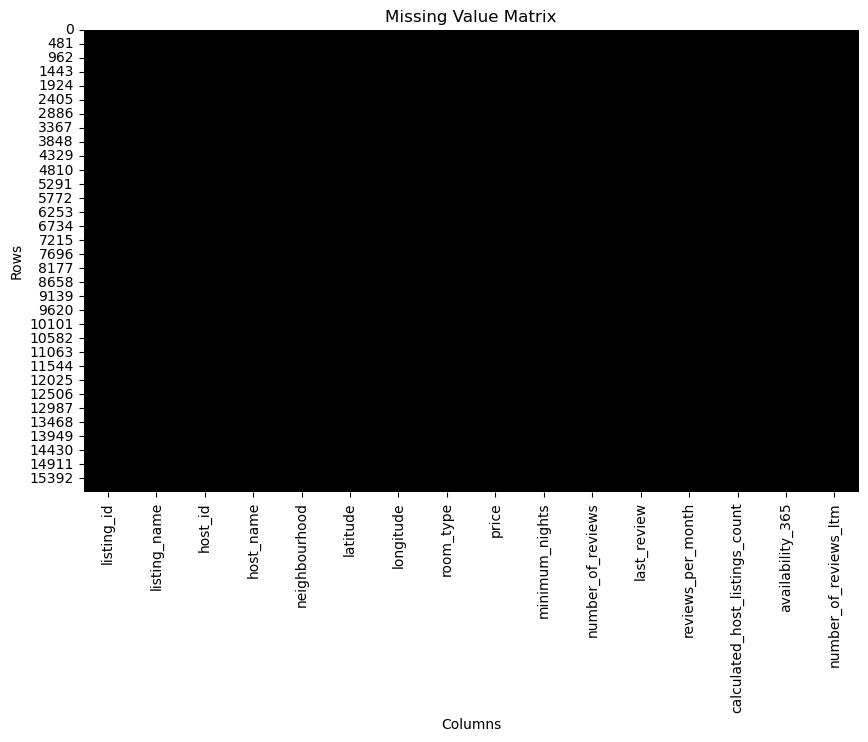

In [20]:
# Create missing value matrix
missing_matrix = df.isnull()

# Plot missing value matrix in black and white
plt.figure(figsize=(10, 6))
sns.heatmap(missing_matrix, cbar=False, cmap='binary_r')
plt.title('Missing Value Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

There are no more missing values in the dataset. Next, we will check for other anomalies in the dataset.

### **4. Handling Duplicate Data** ###



In [21]:
# Check for duplicates
duplicates = df.duplicated()

# Print the result
if duplicates.any():
    print("There are duplicates in the DataFrame.")
else:
    print("There are no duplicates in the DataFrame.")

There are no duplicates in the DataFrame.


Looking deeper into duplicate data without including the listing_id.

In [22]:
# Select columns to check for duplicates (excluding "listing_id")
columns_to_check = df.columns.drop('listing_id')

# Check for duplicates
duplicates = df.duplicated(subset=columns_to_check)

# Count the total number of duplicates
total_duplicates = duplicates.sum()

# Print the result
if total_duplicates > 0:
    print("There are", total_duplicates, "duplicates in the dataset (excluding 'listing_id' column).")
else:
    print("There are no duplicates in the dataset (excluding 'listing_id' column).")

There are 7 duplicates in the dataset (excluding 'listing_id' column).


In [23]:
# Showing duplicates
df[df.drop(columns=['listing_id']).duplicated(keep=False)]

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5890,28831409,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,1900-10-10,0.0,9,361,0
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,1900-10-10,0.0,9,361,0
8789,37953702,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,1900-10-10,0.0,4,180,0
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,1900-10-10,0.0,4,180,0
15183,765632824291529126,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,1900-10-10,0.0,44,340,0
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,1900-10-10,0.0,44,340,0
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,1900-10-10,0.0,40,340,0
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,1900-10-10,0.0,40,340,0
15549,781507744450884041,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,1900-10-10,0.0,33,360,0
15550,781514912980696908,Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9,20133201,Willam,Huai Khwang,13.756184,100.568269,Entire home/apt,2533,3,0,1900-10-10,0.0,33,360,0


From the 7 pairs of duplicated data above, I will handle them by taking the first data and deleting the others.

In [24]:
# Select columns to check for duplicates (excluding "listing_id")
columns_to_check = df.columns.drop('listing_id')

# Drop duplicates, keeping the first occurrence
df.drop_duplicates(subset=columns_to_check, keep='first', inplace=True)

# Check for duplicates again
duplicates_after_drop = df.duplicated(subset=columns_to_check).any()

# Reset the index
df.reset_index(drop=True, inplace=True)

# Print the result
if duplicates_after_drop:
    print("Duplicates still exist in the dataset (excluding 'listing_id' column) after dropping duplicates.")
else:
    print("All duplicates have been dropped from the dataset (excluding 'listing_id' column).")

All duplicates have been dropped from the dataset (excluding 'listing_id' column).


In [25]:
# Showing duplicates
df[df.drop(columns=['listing_id']).duplicated(keep=False)]

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


### ***5. Handling Outlier Data*** ###

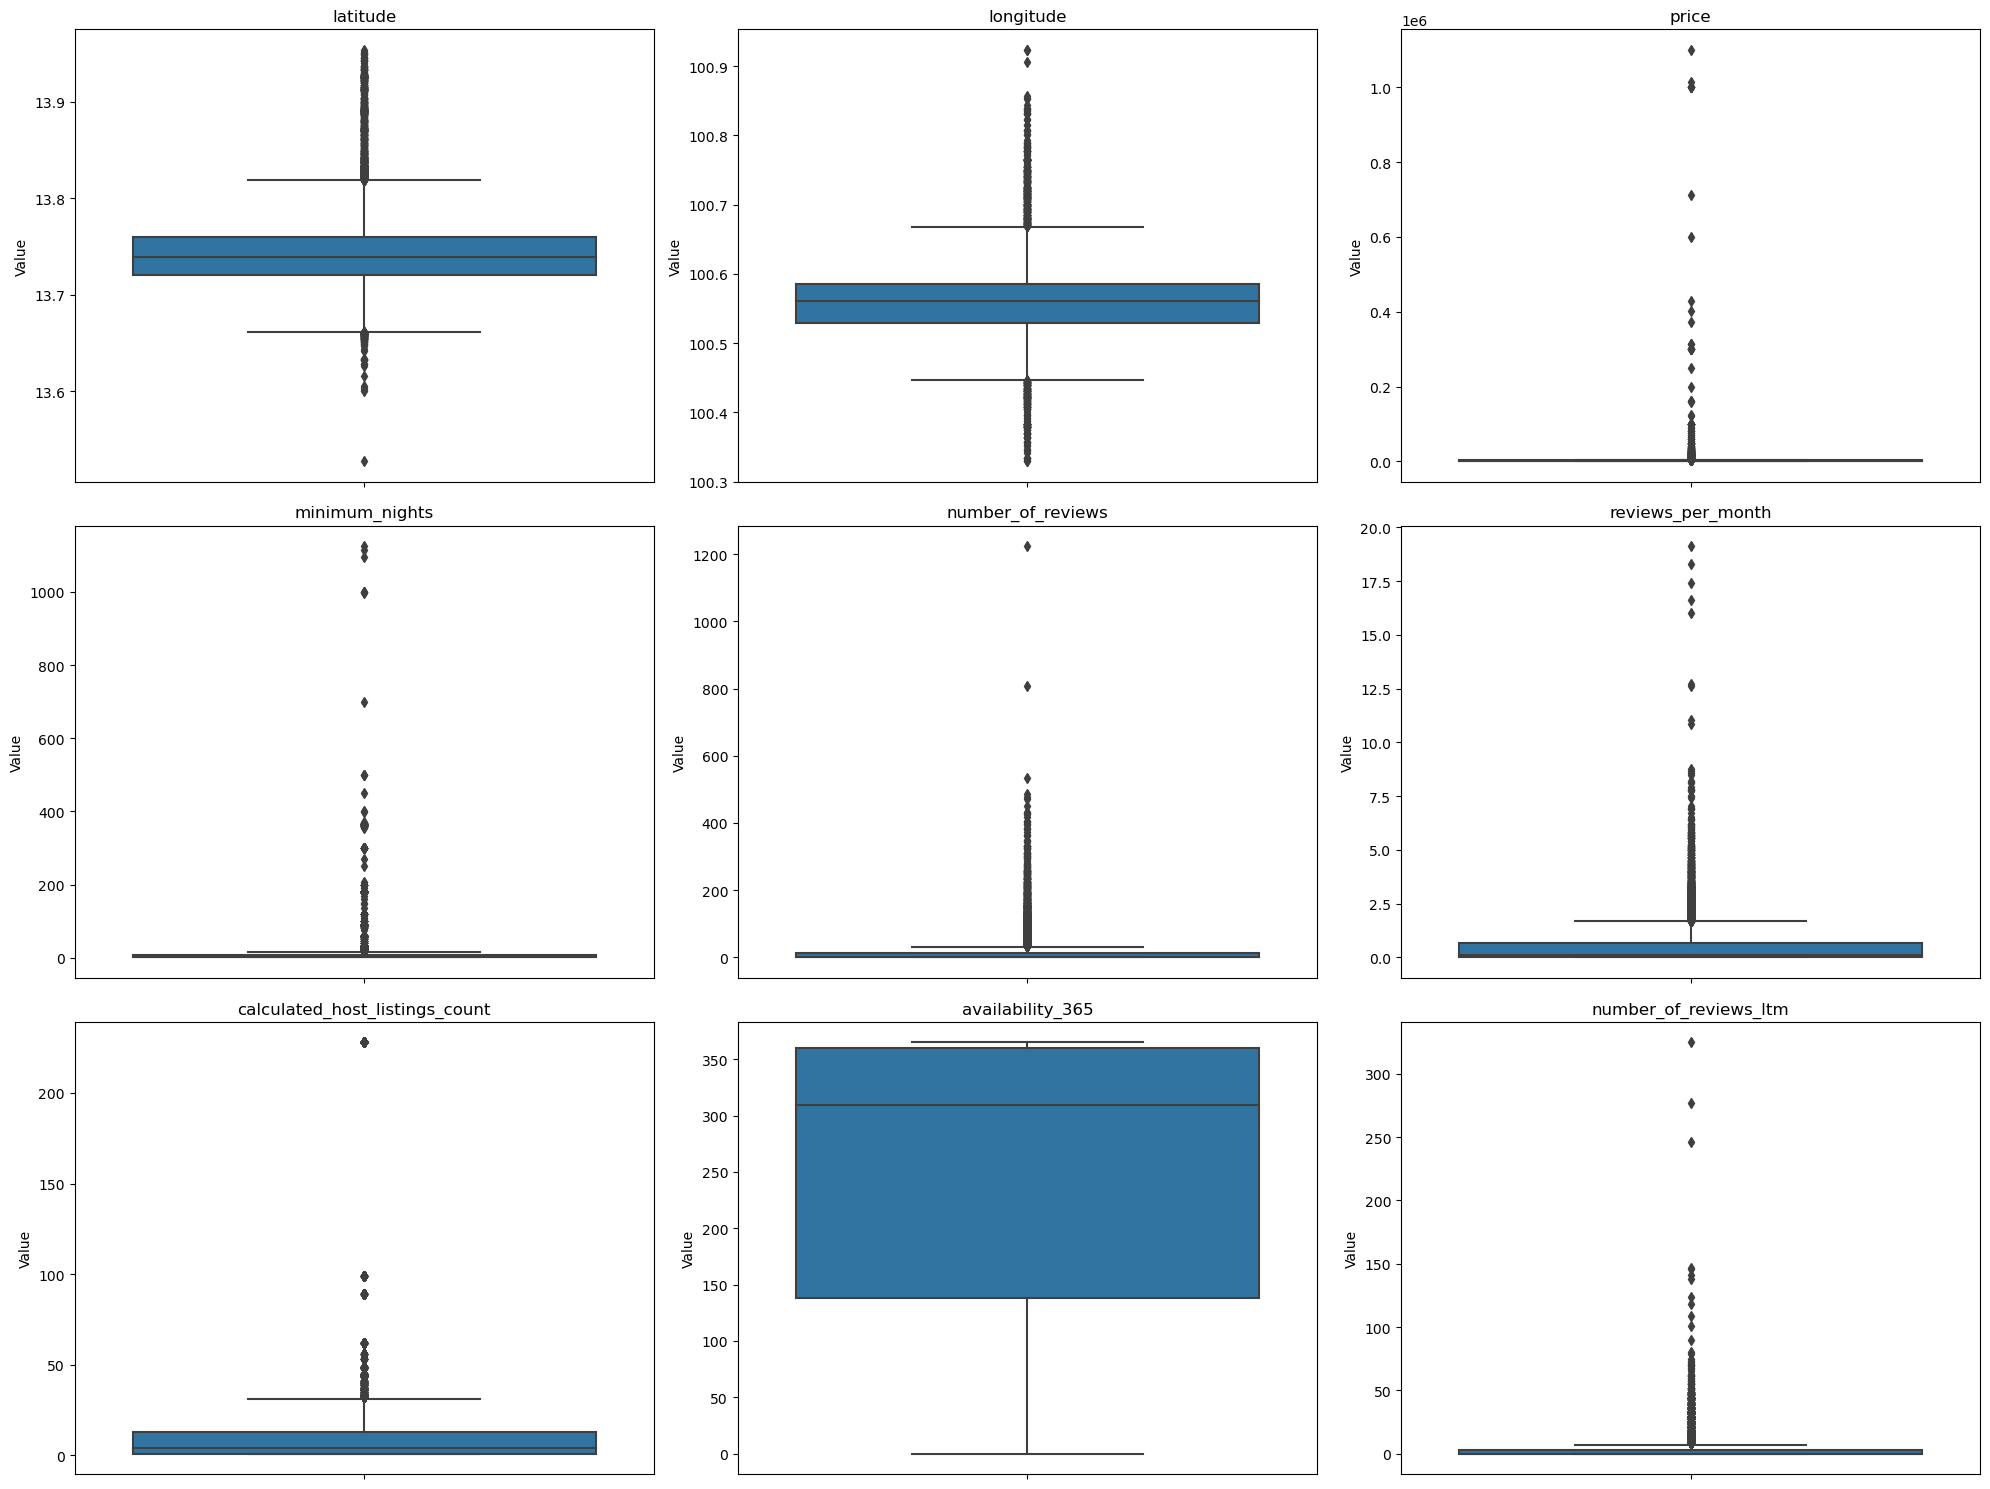

+--------------------------------+------------------+
| Column                         |   Skewness value |
+================================+==================+
| latitude                       |         1.39996  |
+--------------------------------+------------------+
| longitude                      |         0.559012 |
+--------------------------------+------------------+
| price                          |        33.8758   |
+--------------------------------+------------------+
| minimum_nights                 |         8.22788  |
+--------------------------------+------------------+
| number_of_reviews              |         6.26033  |
+--------------------------------+------------------+
| reviews_per_month              |         4.62764  |
+--------------------------------+------------------+
| calculated_host_listings_count |         5.38747  |
+--------------------------------+------------------+
| availability_365               |        -0.575617 |
+---------------------------

In [26]:
# List of columns to check for outliers in numeric columns
columns_to_check_outliers = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                             'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

# Visualizing with Boxplots
plt.figure(figsize=(20,15))
for i, col in enumerate(columns_to_check_outliers, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('Value')
    plt.tight_layout()

plt.show()

# Calculate skewness for the specified columns
skewness_values = df[columns_to_check_outliers].skew()

# Prepare the data for tabulate
table_data = [["Column", "Skewness value"]] + list(zip(columns_to_check_outliers, skewness_values))

# Display the table using tabulate
print(tabulate(table_data, headers='firstrow', tablefmt='grid'))

<span style="color:yellow">In distribution and outliers checking, it was found that:</span>

- <span style="color:yellow">latitude:</span>
    Skewness value 1.39996 means that the data is skewed to the right (positive skewness).
    Have outliers. The outliers are still close to the latitude values of Bangkok and might represent valid listings. **Therefore, they might not need to be handled**. If you're focusing on a specific area of Bangkok, you can consider filtering the data accordingly.

- <span style="color:yellow">longtitude:</span>
    Skewness value 0.559012 means that the data is skewed to the right (positive skewness).
    Have outliers. The outliers are still close to the longtitude values of Bangkok and might represent valid listings. **Therefore, they might not need to be handled**. If you're focusing on a specific area of Bangkok, you can consider filtering the data accordingly.

- <span style="color:yellow">price:</span>
    Skewness value 33.88758 means that the data is skewed to the right (positive skewness).
    Have outliers. The outliers represent extremely high or low prices. **Depending on the analysis, they can be capped, transformed, or removed.**

- <span style="color:yellow">minimum_nights:</span>
    Skewness value 8.22788 means that the data is skewed to the right (positive skewness).
    Have outliers.
    The outliers might affect certain analyses or models. **Consider capping, transforming, or removing them based on the specific use case.**

- <span style="color:yellow">number_of_reviews:</span>
    Skewness value 6.26033 means that the data is skewed to the right (positive skewness).
    Have outliers.
    The outliers might affect certain analyses or models. **Consider capping, transforming, or removing them based on the specific use case.**

- <span style="color:yellow">reviews_per_month:</span>
    Skewness value 4.62764 means that the data is skewed to the right (positive skewness).
    Have outliers.
    The outliers might affect certain analyses or models. **Consider capping, transforming, or removing them based on the specific use case.**

- <span style="color:yellow">calculated_host_listings_count:</span>
    Skewness value 5.38747 means that the data is skewed to the right (positive skewness).
    Have outliers.
    The outliers might affect certain analyses or models. **Consider capping, transforming, or removing them based on the specific use case.**

- <span style="color:yellow">availability_365:</span>
    Skewness value -0.575617 means that the data is skewed to the left (negative skewness).
    No outliers.
    **The data seems reasonable and doesn't need specific outlier handling.**

- <span style="color:yellow">number_of_reviews_ltm:</span>
    Skewness value 9.7243 means that the data is skewed to the right (positive skewness).
    Have outliers.
    The outliers might affect certain analyses or models. **Consider capping, transforming, or removing them based on the specific use case.**

Outliers checking is done on numeric variables only. Priority checking is done on columns that make little sense

#### **5a. Handling Outlier on Price** ####

Using IQR to determine outliers.

In [27]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
num_outliers = len(outliers)

# Calculate the percentage of outliers
percentage_outliers = (num_outliers / len(df)) * 100

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Number of outliers:", num_outliers)
print("Percentage of outliers:", percentage_outliers)

Lower bound: -1393.5
Upper bound: 4722.5
Number of outliers: 1403
Percentage of outliers: 8.853410740203193


Based on the IQR method, the boundaries for outliers are:

Lower bound: -1,393.5 baht (Of course, prices can't be negative. Therefore, we will only consider the upper bound when addressing outliers.)
Upper bound: 4,722.5 baht
In other words, prices higher than 4,722.5 baht are considered outliers according to this IQR method.

There are 1403 outliers or about 8.8%, so I still need to further handle this using the KNN Imputer.



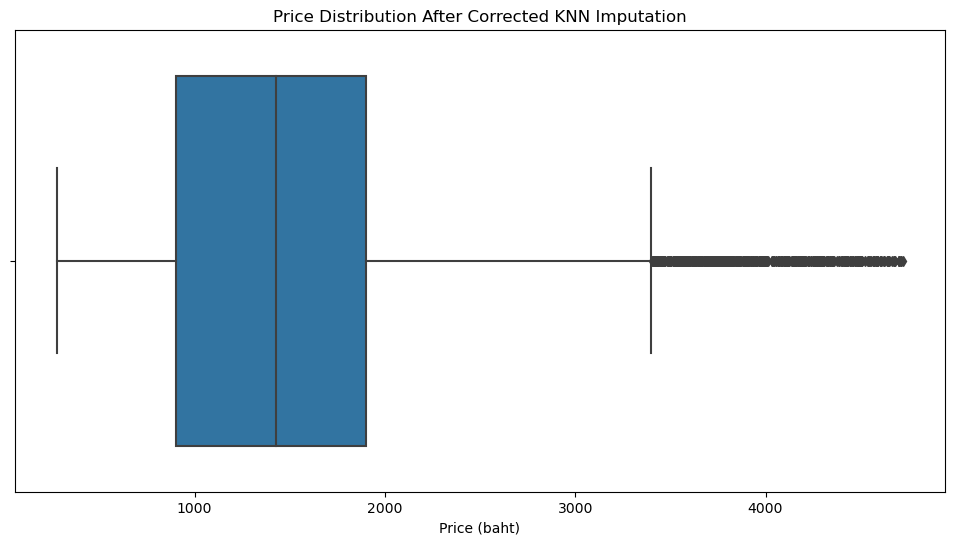

Number of outliers after imputation: 0
Percentage of outliers after imputation: 0.0


count    15847.000000
mean      1563.534963
std        899.889086
min        278.000000
25%        900.000000
50%       1429.000000
75%       1900.000000
max       4720.000000
Name: price, dtype: float64

In [28]:
# Mark outliers (both lower and upper bounds) with NaN for imputation
outlier_mask_knn = (df['price'] < lower_bound) | (df['price'] > upper_bound)
df_knn_corrected = df.copy()
df_knn_corrected.loc[outlier_mask_knn, 'price'] = float('nan')

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
df_knn_corrected['price'] = knn_imputer.fit_transform(df_knn_corrected[['price']])

# Count the number of outliers after imputation
outliers_after_imputation = df_knn_corrected[(df_knn_corrected['price'] < lower_bound) | (df_knn_corrected['price'] > upper_bound)]
num_outliers_after_imputation = len(outliers_after_imputation)

# Calculate the percentage of outliers after imputation
percentage_outliers_after_imputation = (num_outliers_after_imputation / len(df_knn_corrected)) * 100

# Display summary statistics from the 'price' column after imputation.
price_summary_after_knn_corrected = df_knn_corrected['price'].describe()

# Visualize the price distribution after KNN imputation
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_knn_corrected['price'])
plt.title('Price Distribution After Corrected KNN Imputation')
plt.xlabel('Price (baht)')
plt.show()

# Print the number and percentage of outliers after imputation
print("Number of outliers after imputation:", num_outliers_after_imputation)
print("Percentage of outliers after imputation:", percentage_outliers_after_imputation)

price_summary_after_knn_corrected

Using the KNN imputer, we effectively handled the outliers in the "price" column. The boxplot visualization confirmed that the distribution of prices became more consistent after imputation, with no significant extreme outliers. (bahkan sudah tidak ada lagi outlier di kolom price).

#### **5b. Handling Outlier on Minimum_nights** ####

For the minimum_nights column, outlier handling was conducted through binning. Even though there are outliers present in the data, they remain relevant and consistent with their respective categories, negating the need for further modifications or removals. The minimum_nights data is solely required for the classification of short-term and long-term stays, and the binning approach effectively fulfills this requirement.

Binning was conducted by utilizing domain knowledge [Airbnb](https://www.airbnb.com/help/article/475). Based on this, we can categorize the listing types by minimum nights into:

1. Short-term stays: < 28 days
2. Long-term stays: ≥ 28 days

In [29]:
# Binning minimum_nights into "short term" and "long term"
bins = [-1, 28, float('inf')]
labels = ['Short Term', 'Long Term']
df['stay_type'] = pd.cut(df['minimum_nights'], bins=bins, labels=labels)

# Display the counts for each bin
binned_counts = df['stay_type'].value_counts()
binned_counts

Short Term    13551
Long Term      2296
Name: stay_type, dtype: int64

## **Data Preprocessing** ##



### **Identifying and Classifying Popularity Based on Listings** ###

We are using number_of_reviews and reviews_per_month columns to determine popularity, and these two columns are considered the best columns to represent popularity. We classify outliers from these two columns as popular listings.

In [30]:
# Define a function to compute the outliers based on upper IQR only
def compute_upper_outliers(data):
    Q3 = data.quantile(0.75)
    IQR = Q3 - data.quantile(0.25)
    upper_bound = Q3 + 1.5 * IQR
    return data > upper_bound

# Compute upper outliers for the two features
upper_outliers_reviews = compute_upper_outliers(df['number_of_reviews'])
upper_outliers_reviews_per_month = compute_upper_outliers(df['reviews_per_month'].fillna(0))

# Identify listings that are outliers based on either feature
is_popular = upper_outliers_reviews | upper_outliers_reviews_per_month

# Add a new column for the binning results
df['popularity'] = ['Popular' if popular else 'Less Popular' for popular in is_popular]

# Display the first few rows of the dataset with the new column
df[['listing_id', 'number_of_reviews', 'reviews_per_month', 'popularity']].head()

,listing_id,number_of_reviews,reviews_per_month,popularity
0,27934,65,0.50,Popular
1,27979,0,0.00,Less Popular
2,28745,0,0.00,Less Popular
3,35780,2,0.03,Less Popular
4,941865,0,0.00,Less Popular


In [31]:
#identify how many Popular in popularity

df['popularity'].value_counts()

Less Popular    12823
Popular          3024
Name: popularity, dtype: int64

## **Save Clean Data** ## 

In [32]:
# #Save the cleaned data to a new CSV file
# df.to_csv("Airbnb Listing Bangkok Cleaned.csv", index=False)

In [33]:
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,stay_type,popularity
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,Short Term,Popular
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,1900-10-10,0.00,2,358,0,Short Term,Less Popular
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,1900-10-10,0.00,1,365,0,Long Term,Less Popular
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,Short Term,Less Popular
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,1900-10-10,0.00,3,365,0,Short Term,Less Popular


---------------------------------------